<a href="https://colab.research.google.com/github/sharat-R001/Data-Science-/blob/main/Bankruptcy%20Predictor%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pyngrok
!pip install streamlit

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from pyngrok import ngrok
import streamlit as st

#  Load the data
df = pd.read_excel("Bankruptcy.xlsx")
# Convert to DataFrame
df = pd.DataFrame(df)
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


# **StreamLit**

In [ ]:
!ngrok authtoken 2nCXhn8kXpZ4Fhl7FTdPPTYDRUO_7AXUHrv6k3VgX1hXD1rz

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

st.title("BANKRUPTCY PREDICTOR:")

#  user input
def user_input_features():
    industrial_risk = st.sidebar.slider('Industrial Risk (0 = low risk)', 0.0, 1.0, 0.5)
    management_risk = st.sidebar.slider('Management Risk (0 = low risk)', 0.0, 1.0, 0.5)
    financial_flexibility = st.sidebar.slider('Financial Flexibility (0 = low flexibility)', 0.0, 1.0, 0.5)
    credibility = st.sidebar.slider('Credibility (0 = low credibility)', 0.0, 1.0, 0.5)
    competitiveness = st.sidebar.slider('Competitiveness (0 = low competitiveness)', 0.0, 1.0, 0.5)
    operating_risk = st.sidebar.slider('Operating Risk (0 = low risk)', 0.0, 1.0, 0.5)
    data = {'industrial_risk': industrial_risk,
            'management_risk': management_risk,
            'financial_flexibility': financial_flexibility,
            'credibility': credibility,
            'competitiveness': competitiveness,
            'operating_risk': operating_risk}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

df = pd.read_excel('Bankruptcy.xlsx')
X = df.drop(columns=['class'])
y = df['class']

# Split the data and apply SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the logistic regression model
classifier = LogisticRegression(penalty='l2', class_weight='balanced', C=1.0)
classifier.fit(X_train_smote, y_train_smote)

# Predictions based on input
prediction = classifier.predict(input_df)
prediction_proba = classifier.predict_proba(input_df)

st.subheader('User Input Values')
st.write(input_df)

st.subheader('Predictor:')
bankruptcy_status = ['NON-BANKRUPTCY', 'BANKRUPTCY']
st.write(bankruptcy_status[prediction[0]])

st.subheader('Prediction Probability ( 0 = Non-Bankrupt , 1 = Bankrupt)')
st.write(prediction_proba*100)

Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
print(f" URL: {public_url}")


 URL: NgrokTunnel: "https://544f-35-221-211-141.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Check the total number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows is : {duplicate_rows}")


Number of duplicate rows is : 147


In [ ]:
# Drop duplicate rows (if any) from the dataframe
df = df.drop_duplicates()

# Check if duplicates were removed successfully
print(f"Data after dropping duplicates: {df.shape}")
print({df.info()})

Data after dropping duplicates: (103, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        103 non-null    float64
 1   management_risk        103 non-null    float64
 2   financial_flexibility  103 non-null    float64
 3   credibility            103 non-null    float64
 4   competitiveness        103 non-null    float64
 5   operating_risk         103 non-null    float64
 6   class                  103 non-null    object 
dtypes: float64(6), object(1)
memory usage: 6.4+ KB
{None}


In [ ]:
# Encoding with correct binary values (0 for non-bankrupt, 1 for bankrupt)
df['class'] = df['class'].replace({'non-bankruptcy': 0, 'bankruptcy': 1})
df.head()

<ipython-input-4-5041c46711b4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'non-bankruptcy': 0, 'bankruptcy': 1})


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


Feature and Target variable definiton

In [ ]:
# Define features (X) and target (Y)
X = df.iloc[:, 0:6]  # Features
Y = df['class']      # Target variable


VIF helps in Identifying multicollinearity among features in the dataset. usually < 10 is optimal.

In [ ]:
# Adding constant column for statsmodels VIF calculation
X_with_const = sm.add_constant(X)

# Calculating VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(X.shape[1])]

print(vif)


                Variable       VIF
0        industrial_risk  1.173784
1        management_risk  1.088004
2  financial_flexibility  1.445276
3            credibility  1.512495
4        competitiveness  1.777002
5         operating_risk  1.047039


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=42)

#
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(41, 6) (62, 6) (41,) (62,)


# LOG REGRESSION

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
# Initialize Logistic Regression with L2 regularization and handling class imbalance
classifier = LogisticRegression(penalty='l2', class_weight='balanced', C=1.0)

# Fit the model on training data
classifier.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced')

In [ ]:
# Print model coefficients (weights for each feature)
print("Model Coefficients:", classifier.coef_)


Model Coefficients: [[ 0.39042681  0.18571238 -1.53522516 -1.13546116 -2.19251427  0.89958081]]


In [ ]:
# Predictions on training data
y_train_pred = classifier.predict(X_train)

# Confusion Matrix and Classification Report
print("Confusion Matrix (Training Data):")
print(confusion_matrix(Y_train, y_train_pred))

print("Classification Report (Training Data):")
print(classification_report(Y_train, y_train_pred))

# ROC and AUC scores
roc_auc_train = roc_auc_score(Y_train, classifier.predict(X_train))
print(f"ROC-AUC Score (Training Data): {roc_auc_train}")


Confusion Matrix (Training Data):
[[35  0]
 [ 0  6]]
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         6

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

ROC-AUC Score (Training Data): 1.0


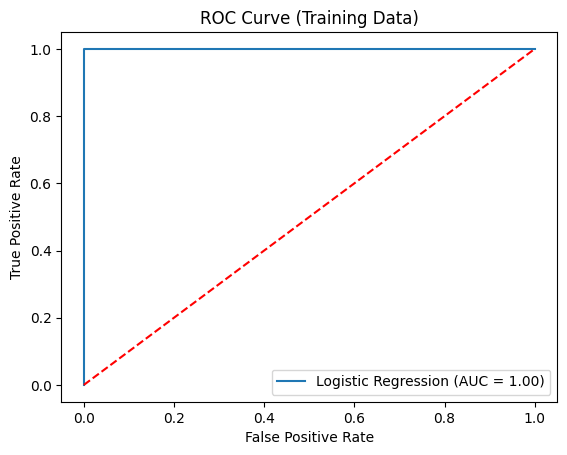

In [ ]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Perform 5-fold cross-validation for more robust evaluation
cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validated Accuracy (5-fold): {cv_scores.mean()}")


Cross-Validated Accuracy (5-fold): 1.0


Confusion Matrix (Test Data):
[[43  0]
 [ 1 18]]
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.95      0.97        19

    accuracy                           0.98        62
   macro avg       0.99      0.97      0.98        62
weighted avg       0.98      0.98      0.98        62

ROC-AUC Score (Test Data): 0.9736842105263157


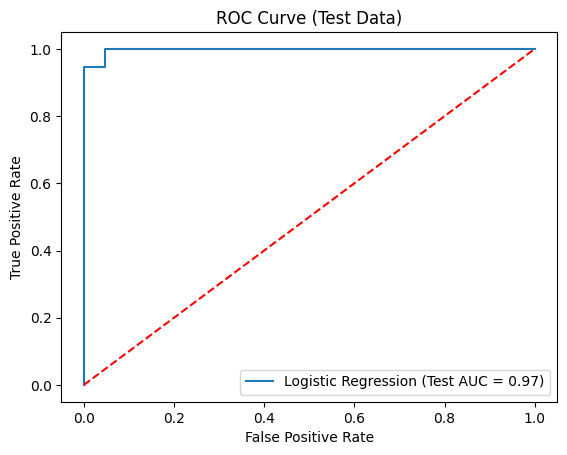

In [ ]:
# Evaluate on test data
y_test_pred = classifier.predict(X_test)

print("Confusion Matrix (Test Data):")
print(confusion_matrix(Y_test, y_test_pred))

print("Classification Report (Test Data):")
print(classification_report(Y_test, y_test_pred))

# ROC-AUC score on test data
roc_auc_test = roc_auc_score(Y_test, classifier.predict(X_test))
print(f"ROC-AUC Score (Test Data): {roc_auc_test}")

# Plot ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(Y_test, classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr_test, tpr_test, label=f'Logistic Regression (Test AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data)')
plt.legend(loc='lower right')
plt.show()


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
#  Split the dataset with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

#  Initialize the RF classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
#  Predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

#  Confusion matrix and classification report
print("Confusion Matrix (Test Data):")
print(confusion_matrix(Y_test, y_test_pred))

print("Classification Report (Test Data):")
print(classification_report(Y_test, y_test_pred))

#  ROC-AUC  on test data
roc_auc_test = roc_auc_score(Y_test, rf_classifier.predict(X_test))
print(f"ROC-AUC Score (Test Data): {roc_auc_test}")


Confusion Matrix (Test Data):
[[16  0]
 [ 1  4]]
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

ROC-AUC Score (Test Data): 0.9


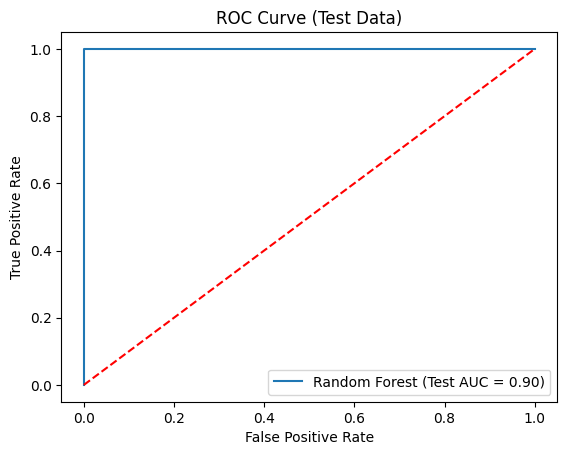

In [ ]:
#  Plot ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(Y_test, rf_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr_test, tpr_test, label=f'Random Forest (Test AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data)')
plt.legend(loc='lower right')
plt.show()

# KNN

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Split the dataset into features
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=7,weights='uniform',metric= 'euclidean')
# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

Confusion Matrix (Test Data):
[[16  0]
 [ 1  4]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

